In [1]:
import matplotlib.pyplot as plt
import pandas as pd

datasets = pd.read_csv('datasets/datasets-label.csv')
svm = pd.read_csv('datasets/evaluation_results_SVM.csv')
nb = pd.read_csv('datasets/evaluation_results_nb.csv')
knn = pd.read_csv('datasets/evaluation_results_knn.csv')

Text(0.5, 1.0, 'Distribusi Label')

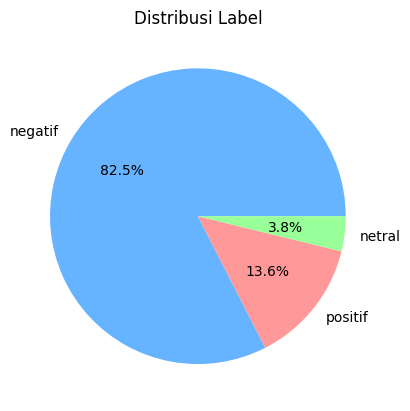

In [2]:
#pie chart
label_counts = datasets['label'].value_counts()

fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'])
ax.set_title('Distribusi Label')


In [2]:
# convert created_at to datetime
import datetime
import pandas as pd

datasets = pd.read_csv('datasets/datasets-keyword-label.csv') 
datasets['created_at'] = pd.to_datetime(datasets['created_at'], format="%a %b %d %H:%M:%S %z %Y")

datasets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          8369 non-null   datetime64[ns, UTC]
 1   full_text           8369 non-null   object             
 2   keyword             8369 non-null   object             
 3   cleanning_text      8369 non-null   object             
 4   case_folding        8369 non-null   object             
 5   convert_slang_word  8369 non-null   object             
 6   filtering           8369 non-null   object             
 7   tokenizing          8369 non-null   object             
 8   stemming            8369 non-null   object             
 9   score               8369 non-null   int64              
 10  label               8369 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(9)
memory usage: 719.3+ KB


In [3]:
datasets.to_csv('datasets/datasets-keyword-label.csv', index=False)

In [3]:
# Output hasil konversi
print(datasets.head())
print(datasets.dtypes)

                 created_at  \
0 2024-12-30 07:08:54+00:00   
1 2024-12-30 02:09:58+00:00   
2 2024-12-29 02:45:40+00:00   
3 2024-12-28 11:10:45+00:00   
4 2024-12-28 07:30:00+00:00   

                                           tweet_url      username  \
0  https://x.com/JavanicaPost/status/187362730463...  JavanicaPost   
1  https://x.com/digivestasi/status/1873552074291...   digivestasi   
2  https://x.com/ilhamiasnawi/status/187319867055...  ilhamiasnawi   
3  https://x.com/bankbsi_id/status/18729633946321...    bankbsi_id   
4  https://x.com/CIMBNiaga/status/187290783871422...     CIMBNiaga   

                                           full_text    label  
0  mudah belanja akses produk pinjam tantang fina...   Netral  
1  langkah sederhana investasi gen z capai stabil...  Positif  
2     langkah mudah investasi gen z finansial stabil  Positif  
3  asalamualaikum alaikum sahabat syariat tantang...  Positif  
4  finansial sehat uang kelola tabung investasi b...  Positif  
created_

In [6]:
# penggabungan data evaluation
# Menambahkan kolom 'model' ke setiap DataFrame
svm['model'] = 'svm'
nb['model'] = 'nb'
knn['model'] = 'knn'

# Mengatur ulang kolom agar 'model' menjadi kolom pertama
svm = svm[['model'] + [col for col in svm.columns if col != 'model']]
nb = nb[['model'] + [col for col in nb.columns if col != 'model']]
knn = knn[['model'] + [col for col in knn.columns if col != 'model']]

# Menggabungkan semua DataFrame
combined_df = pd.concat([svm, nb, knn], axis=0, ignore_index=True)

# Menampilkan hasil
print(combined_df.head())

  model                       Confusion Matrix  \
0   svm  [847  11  31   0 889   0   9   0 881]   
1    nb  [668  43 178   0 889   0   2  35 853]   
2   knn  [324 289 276   0 889   0   0   4 886]   

                               Classification Report  \
0  {'negatif': {'precision': 0.9894859813084113, ...   
1  {'negatif': {'precision': 0.9970149253731343, ...   
2  {'negatif': {'precision': 1.0, 'recall': 0.364...   

                             Cross-Validation Scores  Mean CV Score  \
0  [0.9456521739130435, 0.9647676161919041, 0.980...       0.969562   
1  [0.8860569715142429, 0.8931784107946027, 0.902...       0.901411   
2  [0.6930284857571214, 0.6941529235382309, 0.763...       0.753644   

   Std Dev CV Score  
0          0.014335  
1          0.010737  
2          0.065743  


In [7]:
combined_df.to_csv('datasets/evaluation_results.csv', index=False)

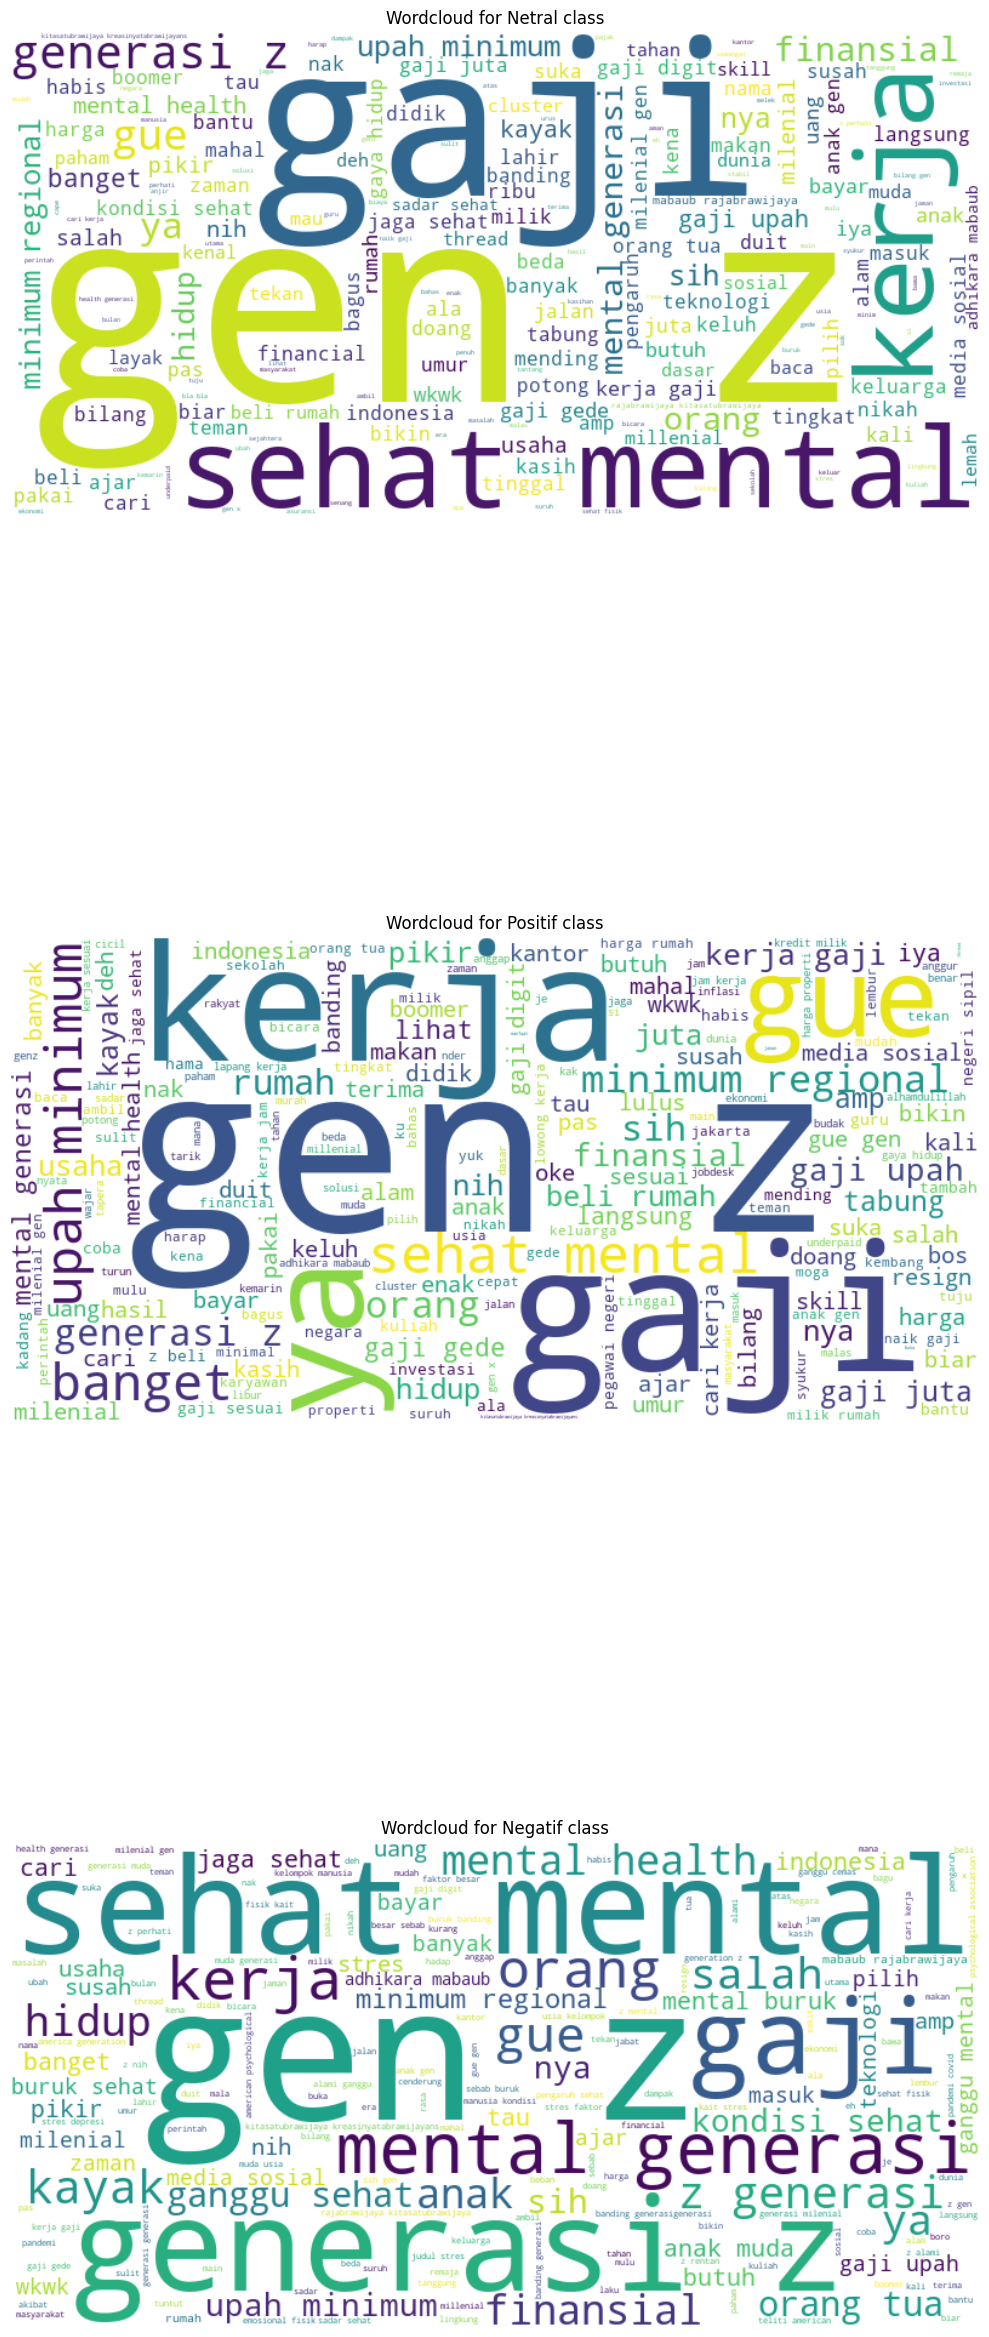

In [5]:
# wordcloud
from wordcloud import WordCloud

# Membuat wordcloud untuk setiap kelas
labels = datasets['label'].unique()

fig, axes = plt.subplots(len(labels), 1, figsize=(10, 30))

for i, label in enumerate(labels):
    text = " ".join(datasets[datasets['label'] == label]['full_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Wordcloud for {label} class')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [1]:
import pandas as pd

df = pd.read_csv('datasets/word_count_labeled.csv')

df.value_counts('label')

label
netral     8662
negatif    1246
positif     519
Name: count, dtype: int64

# testing model

In [2]:
import joblib

# muat model
model_svm = joblib.load('models/svm_model.pkl')
model_nb = joblib.load('models/nb_model.pkl')
model_knn = joblib.load('models/knn_model.pkl')

In [4]:
import pickle

# Load model yang sudah disimpan sebelumnya
with open('models/svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load kembali TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Contoh data baru untuk prediksi
new_text = ["Gaji rendah membuat saya stres"]

# Transformasi teks menjadi fitur numerik
X_new = vectorizer.transform(new_text)

FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_vectorizer.pkl'

In [ ]:
# Lakukan prediksi
predicted_class = model.predict(X_new)

# Cetak hasil prediksi
print("Sentimen Prediksi:", predicted_class[0])